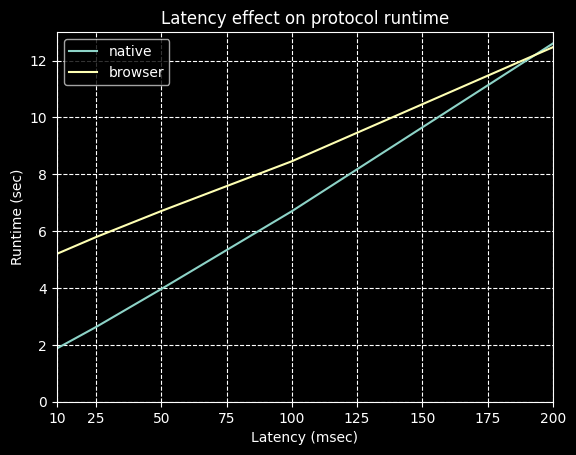

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes
import pandas as pd

for dark in [True, False]:
    if dark:
        plt.style.use("dark_background")
    else:
        plt.style.use("default")

    df1 = pd.read_csv("latency.native.csv", header=0)
    df2 = pd.read_csv("latency.browser.csv", header=0)

    agg1 = df1.groupby("latency")["time_total"].mean().reset_index()
    agg2 = df2.groupby("latency")["time_total"].mean().reset_index()

    plt.plot(agg1["latency"], agg1["time_total"]/1000.0, label="native")
    plt.plot(agg2["latency"], agg2["time_total"]/1000.0, label="browser")

    plt.xlim(10, 200)
    plt.ylim(0, 13)

    # force ticks, otherwise 10 is not displayed
    plt.xticks([10] + list(range(25, 201, 25)))

    plt.xlabel("Latency (msec)")
    plt.ylabel("Runtime (sec)")
    plt.title("Latency effect on protocol runtime")
    plt.legend(loc="upper left") 

    plt.grid(True, linestyle="--")

    svg_name = "latency_dark.svg" if dark else "latency_light.svg"

    plt.savefig(svg_name, bbox_inches="tight")

    plt.show()

